<a href="https://colab.research.google.com/github/ameyadalvi84/Keras/blob/master/MNIST_dataset_and_Convolution_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Convolutional Network with MNIST dataset.

In [0]:
import keras as K
from keras import models, layers
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

print("Shape of train_images :",train_images.shape)
print("Max value in train_images : ", train_images.max())
print("Min value in train_images : ", train_images.min())

Shape of train_images : (60000, 28, 28)
Max value in train_images :  255
Min value in train_images :  0


Display Image

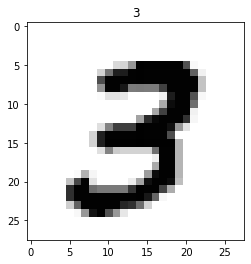

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

random.seed(71234)
indx = random.randint(1,10)
plt.imshow(train_images[indx],cmap = plt.cm.binary)
plt.title(train_labels[indx])
plt.show()

Reshaping data and normalizing the inputs

In [0]:
from keras.utils import to_categorical

train_images_reshape = train_images.reshape((train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
train_images_reshape = train_images_reshape.astype('float32') / train_images.max()
test_images_reshape = test_images.reshape((test_images.shape[0],test_images.shape[1],test_images.shape[2],1))
test_images_reshape = test_images_reshape.astype('float32') / test_images.max()

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

Building the Model

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

Executing the model on training data and validation data

In [24]:
num_val_records = 10000
epochs = 25
val_images = train_images_reshape[:num_val_records]
val_labels = train_labels_cat[:num_val_records]
partial_train_images = train_images_reshape[num_val_records:]
partial_train_labels = train_labels_cat[num_val_records:]
model1=build_model()
history = model1.fit(partial_train_images,
                     partial_train_labels,
                     epochs= epochs,
                     batch_size=128,
                     validation_data = (val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.2659 - accuracy: 0.9231 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 2/25
50000/50000 [==============================] - 5s 105us/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0649 - val_accuracy: 0.9811
Epoch 3/25
50000/50000 [==============================] - 5s 103us/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0626 - val_accuracy: 0.9821
Epoch 4/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0463 - val_accuracy: 0.9861
Epoch 5/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0441 - val_accuracy: 0.9881
Epoch 6/25
50000/50000 [==============================] - 5s 99us/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0518 - val_accuracy: 0.9850
Epoch 7/25
50000/50000 [==============================] - 5s 99

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

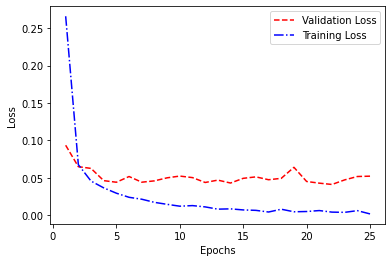

In [26]:
validation_loss = history_dict['val_loss']
validation_acc = history_dict['val_accuracy']
train_loss = history_dict['loss']
train_acc = history_dict['accuracy']
epoch_num = range(1,len(validation_loss)+1)
plt.plot(epoch_num,validation_loss,'r--',label="Validation Loss")
plt.plot(epoch_num,train_loss,'b-.',label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

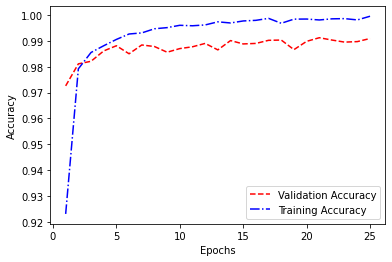

In [27]:
plt.plot(epoch_num,validation_acc,'r--',label="Validation Accuracy")
plt.plot(epoch_num,train_acc,'b-.',label='Training Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend()
plt.show()

Final training

In [35]:
model1.fit(train_images_reshape,
           train_labels_cat,
           batch_size=128,
           epochs=22,
           verbose = 0)

In [36]:
result = model1.evaluate(test_images_reshape,test_labels_cat)

10000/10000 [==============================] - 1s 104us/step


In [37]:
result

[0.0553876274310303, 0.9934999942779541]

In [0]:
Y_pred = model1.predict(test_images_reshape)

In [0]:
y_pred = np.argmax(Y_pred,axis=1)

In [40]:
print("Confusion Matrix")
print(confusion_matrix(test_labels,y_pred))

Confusion Matrix
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1133    0    0    0    2    0    0    0    0]
 [   2    0 1022    0    1    0    0    6    1    0]
 [   0    0    2 1004    0    3    0    0    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   1    1    0    5    0  883    1    0    0    1]
 [   1    2    0    0    2    1  952    0    0    0]
 [   0    2    1    0    1    0    0 1021    0    3]
 [   0    0    3    1    0    1    0    0  968    1]
 [   1    0    0    1    6    3    0    3    2  993]]


In [54]:
print("Classification_report")
print(classification_report(test_labels,y_pred))

Classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

